In [1]:
import pandas as pd 
df = pd.read_json('data.json')
df = pd.DataFrame([i for i in df.data])
df.head()

,category,event_name,gender,age,marital_status,session_id,device,client_time,location,amount
0,Sports,View Project,M,18-24,married,69f62d2ae87640f5a2dde2b2e9229fe6,android,1393632004,"{'latitude': 40.189788, 'city': 'Lyons', 'stat...",NaN
1,Technology,View Project,M,18-24,single,4459d001feb8438eae5f4ec24abcd992,iOS,1393632022,"{'latitude': 33.844371, 'city': 'Alpharetta', ...",NaN
2,Environment,View Project,M,55+,single,0db9ed700a184d48a9d04806696e3642,iOS,1393632032,"{'latitude': 42.446396, 'city': 'Westford', 's...",NaN
3,Technology,View Project,M,18-24,single,68195e2372bd4022b17220fc21de9138,android,1393632038,"{'latitude': 44.624413, 'city': 'Saranac', 'st...",NaN
4,Sports,View Project,F,25-34,married,9508a8385dc94773baba8aa7d1c2aa75,iOS,1393632051,"{'latitude': 36.747083, 'city': 'Lampe', 'stat...",NaN


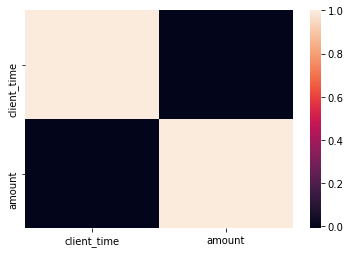

In [2]:
# from this heat map found out that there is no corelation between amount and client_time
import seaborn as sns
sns.heatmap(df.corr())

In [3]:
def update_loc(location):
    return(location['city'])

df['location']=df['location'].apply(update_loc)

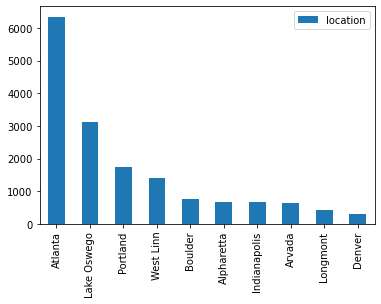

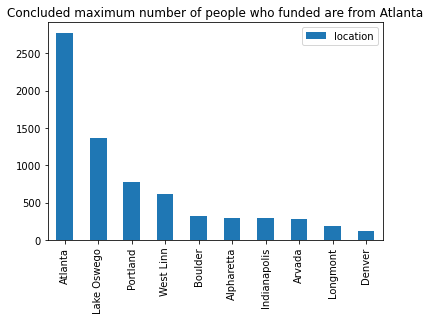

In [4]:
data = pd.DataFrame(df['location'].value_counts())
data = data.head(10)

filt = ((df['event_name'] == 'Fund Project'))
filt = df[filt]

data1 = pd.DataFrame(filt['location'].value_counts())
data1 = data1.head(10)

data.plot(kind='bar')
data1.plot(kind='bar', title="Concluded maximum number of people who funded are from Atlanta")



In [5]:
df.drop(columns=['client_time'],inplace=True)
# filt1=(df['event_name'] == 'Fund Project')
# df1 = df[filt1]
# df1

dict_items([('45-54', 39.61201501877347), ('18-24', 42.7915556466489), ('35-44', 40.083882564409826), ('55+', 39.882651443070095), ('25-34', 40.057775637939336)])


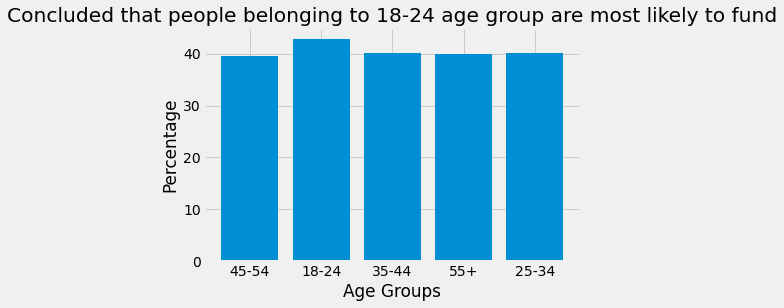

In [6]:
from matplotlib import pyplot as plt
from collections import Counter

plt.style.use('fivethirtyeight')


filt = ((df['event_name'] == 'Fund Project'))
filt = df[filt]

count=[]
total=[]
final={}

for y in df['age']:
    total.append(y)
total = Counter(total)
total = dict(total)


for i in filt['age']:
    count.append(i)
count = Counter(count)
count = dict(count)


for i in count.keys():
    final[i] = (count[i]/total[i])*100

final=final.items()
print(final)

labels = [x for (x,y) in final]
slices = [y for (x,y) in final]


plt.bar(labels,slices)

plt.ylabel('Percentage')
plt.xlabel('Age Groups')
plt.title("Concluded that people belonging to 18-24 age group are most likely to fund")

plt.show()

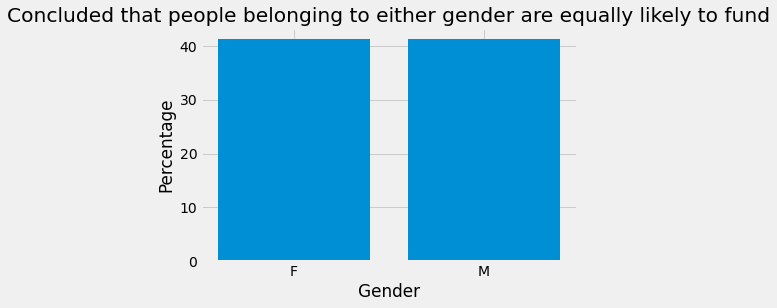

In [7]:
count=[]
total=[]
final={}

for y in df['gender']:
    total.append(y)
total = Counter(total)
total = dict(total)
total.pop('U')

for i in filt['gender']:
    count.append(i)
count = Counter(count)
count = dict(count)
count.pop('U')

for i in count.keys():
    final[i] = (count[i]/total[i])*100

final=final.items()
    
labels = [x for (x,y) in final]
slices = [y for (x,y) in final]


plt.bar(labels,slices)

plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.title("Concluded that people belonging to either gender are equally likely to fund")

plt.show()

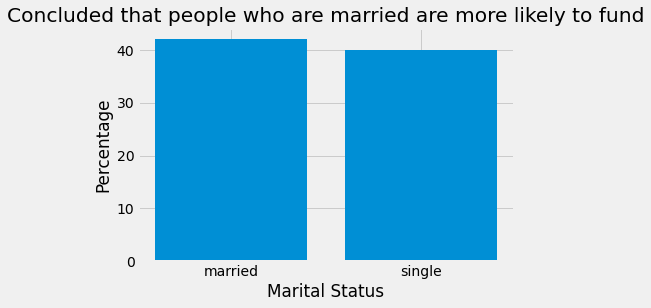

In [8]:
count=[]
total=[]
final={}

for y in df['marital_status']:
    total.append(y)
total = Counter(total)
total = dict(total)

for i in filt['marital_status']:
    count.append(i)
count = Counter(count)
count = dict(count)

for i in count.keys():
    final[i] = (count[i]/total[i])*100

final=final.items()

labels = [x for (x,y) in final]
slices = [y for (x,y) in final]

plt.bar(labels,slices)

plt.ylabel('Percentage')
plt.xlabel('Marital Status')
plt.title("Concluded that people who are married are more likely to fund")

plt.show()

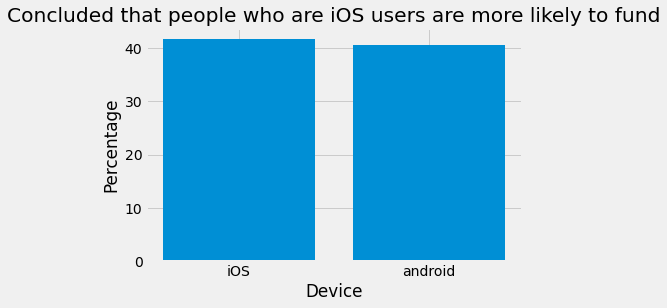

In [9]:
count=[]
total=[]
final={}

for y in df['device']:
    total.append(y)
total = Counter(total)
total = dict(total)

for i in filt['device']:
    count.append(i)
count = Counter(count)
count = dict(count)

for i in count.keys():
    final[i] = (count[i]/total[i])*100

final=final.items()

labels = [x for (x,y) in final]
slices = [y for (x,y) in final]

plt.bar(labels,slices)

plt.ylabel('Percentage')
plt.xlabel('Device')
plt.title("Concluded that people who are iOS users are more likely to fund")

plt.show()

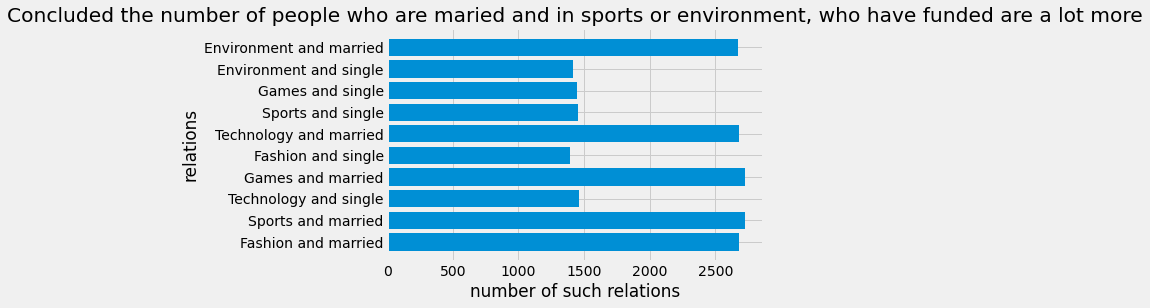

In [10]:
def merge(list1, list2): 
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 
relation = (Counter(merge(list(filt['category']),list(filt['marital_status'])))).items()

x_axis=[]

for (a,b) in relation:
    final = a[0]+' and '+a[1]
    x_axis.append(final)
    
y_axis = [y for (x,y) in relation]

plt.barh(x_axis,y_axis)

plt.ylabel('relations')
plt.xlabel('number of such relations')
plt.title("Concluded the number of people who are maried and in sports or environment, who have funded are a lot more")

plt.show()

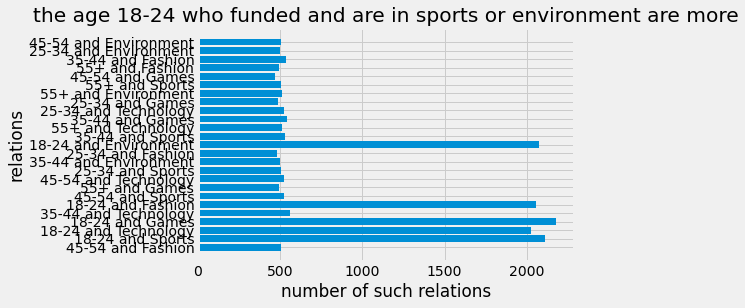

In [11]:
relation1 = (Counter(merge(list(filt['age']),list(filt['category'])))).items()

x_axis=[]

for (a,b) in relation1:
    final = str(a[0])+' and '+a[1]
    x_axis.append(final)
    
y_axis = [y for (x,y) in relation1]

plt.barh(x_axis,y_axis)

plt.ylabel('relations')
plt.xlabel('number of such relations')
plt.title("the age 18-24 who funded and are in sports or environment are more")

plt.show()

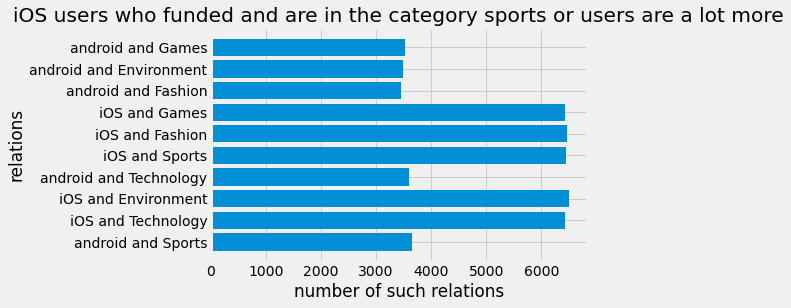

In [12]:
relation2 = Counter(merge(df['device'],df['category'])).items()

x_axis=[]

for (a,b) in relation2:
    final = a[0]+' and '+a[1]
    x_axis.append(final)
    
y_axis = [y for (x,y) in relation2]

plt.barh(x_axis,y_axis)

plt.ylabel('relations')
plt.xlabel('number of such relations')
plt.title("iOS users who funded and are in the category sports or users are a lot more")

plt.show()

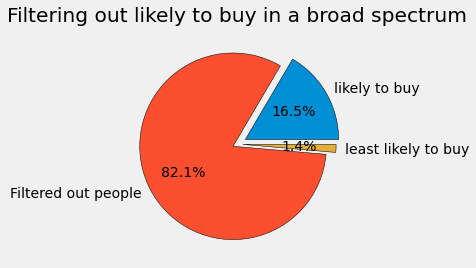

In [13]:
labels = ['likely to buy','Filtered out people','least likely to buy']
explode = (0.1,0.05,0.06)

filt1 = ((df['event_name'] == 'Fund Project') & ((df['category'] == 'Sports') | (df['category'] == 'Environment')))
filt1 = df[filt1]

least = ((df['age'] == '45-54') & (df['marital_status']=='single') & (df['device'] == 'android') & (df['event_name']=='View Project'))
least = df[least]
least
plt.title('Filtering out likely to buy in a broad spectrum')

plt.pie([filt1.shape[0],df.shape[0]-(filt1.shape[0]+least.shape[0]),least.shape[0]],labels=labels,explode=explode,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.show()

[1281, 4946, 430, 14001]


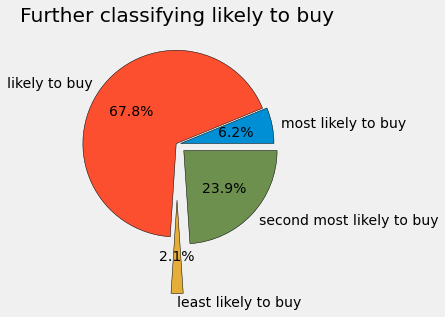

In [14]:
most = ((filt['age'] == '18-24') & (filt['marital_status']=='married') & (filt['device'] == 'iOS') & (filt['location'] == 'Atlanta'))
most = filt[most]
second_most = (((filt['age'] == '35-44') | (filt['age'] == '18-24')) & (filt['marital_status']=='married') & (filt['device'] == 'iOS') &  (filt['location'] != 'Atlanta'))
second_most = filt[second_most]
least_most = ((filt['age'] == '45-54') & (filt['marital_status']=='single') & (filt['device'] == 'android'))
least_most = filt[least_most]

labels = ['most likely to buy','likely to buy','least likely to buy','second most likely to buy']

plt.title('Further classifying likely to buy')

explode=(0.04,0.01,0.6,0.1)

slices = [most.shape[0],filt.shape[0]-(most.shape[0]+second_most.shape[0]+least_most.shape[0]),least_most.shape[0],second_most.shape[0]]
    
plt.pie(slices,labels=labels,explode=explode,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
print([most.shape[0],second_most.shape[0],least_most.shape[0],filt.shape[0]-(most.shape[0]+second_most.shape[0]+least_most.shape[0])])


In [15]:
most.head()

,category,event_name,gender,age,marital_status,session_id,device,location,amount
100,Sports,Fund Project,F,18-24,married,a1fdfe0bebed4510a9059bcfb3ba1325,iOS,Atlanta,48.0
115,Fashion,Fund Project,F,18-24,married,d67decbc1467430692bb40dad08ba5bb,iOS,Atlanta,53.0
249,Fashion,Fund Project,F,18-24,married,d831bf298f694a8f80f0002ae78225bd,iOS,Atlanta,14.0
389,Technology,Fund Project,M,18-24,married,531119a655fa4a35a32b470f5eae1f02,iOS,Atlanta,19.0
420,Environment,Fund Project,F,18-24,married,6b3cc31bdc13499ea2b776fe82550530,iOS,Atlanta,55.0


In [18]:
second_most.head()

,category,event_name,gender,age,marital_status,session_id,device,location,amount
62,Games,Fund Project,M,18-24,married,19abc29b0efe4b7db728483a9b745480,iOS,Portland,59.0
74,Games,Fund Project,F,18-24,married,d64b5224dc8c4afd848d15b191e50287,iOS,Lafayette,44.0
120,Technology,Fund Project,M,35-44,married,cfaa408840fc49b0bc34ebd4ee1cd6c5,iOS,Eldorado,50.0
140,Fashion,Fund Project,M,18-24,married,60079852d99b48978dd598e482fa0fb7,iOS,Lake Oswego,39.0
157,Games,Fund Project,M,18-24,married,ebdd4567d37d4c2793893dbe17b57cf3,iOS,Portland,57.0


In [19]:
least_most.head()

,category,event_name,gender,age,marital_status,session_id,device,location,amount
64,Fashion,Fund Project,F,45-54,single,efe1feab12f54efd8edc7493cf692b13,android,Henderson,58.0
131,Sports,Fund Project,M,45-54,single,d23a964e8656403b853eb2a24139c408,android,Kansas City,27.0
1645,Sports,Fund Project,M,45-54,single,6ab0c153cb994e428a304be01a7dc652,android,Lake Hughes,29.0
1705,Technology,Fund Project,U,45-54,single,884f58b41ae444eba95d6f5547047f15,android,Ramsey,29.0
1709,Fashion,Fund Project,M,45-54,single,201d6aeadda74a94915cd1e0a6cc80b7,android,Pasadena,70.0
